#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from queue import Queue
from sklearn.cluster import KMeans
import seaborn as sns

#Data Preprocessing

In [ ]:
url = 'https://drive.google.com/file/d/1bvWKZasDHdb1y2XHKXSaRcudhFf9_aP6/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path)

In [ ]:
def feature_scaling(X): #Making the points have zero mean and unit variance
  X_t = np.transpose(X)
  for i in range(len(X_t)):
    X_t[i]-=np.mean(X_t[i])
    X_t[i]/=np.std(X_t[i])
  return np.transpose(X_t)

<Axes: title={'center': 'Visualisation of Dataset 2'}, xlabel='x-axis', ylabel='y-axis'>

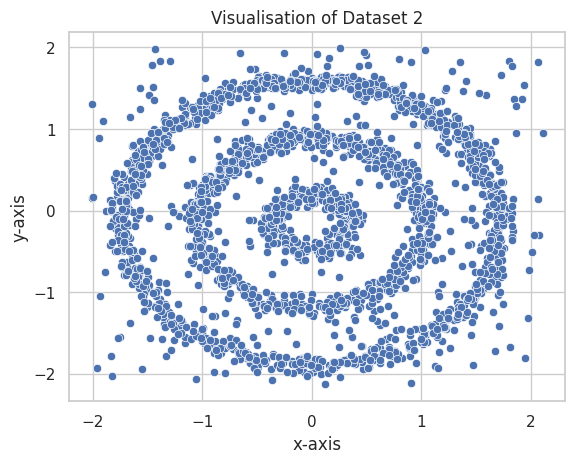

In [ ]:
data = dataset.to_numpy()
points = data[:,[0,1]]
points = feature_scaling(points)
X = points[:,0]
Y = points[:,1]
plt.title('Visualisation of Dataset 2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
sns.set(style='whitegrid')
sns.scatterplot(x=X,y=Y,data=points)

#Finding Optimal values for parameters

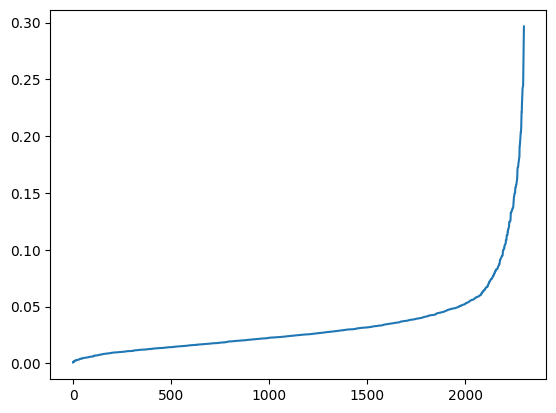

In [ ]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(points)
distances, indices = neighbors_fit.kneighbors(points)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#Building the DBSCAN classifier

##Helper Functions:
1. Distance function - finding **Euclidean** distance
2. Range function - finding neighbours to a point within epsilon distance

In [ ]:
def EuclideanDist(point1,point2):
  dist = sqrt((point1[0]-point2[0])**2+(point1[1]-point2[1])**2)
  return dist

In [ ]:
def RangePoints(epsilon,point,points):
  neighbours = []
  for i in range(len(points)):
    if EuclideanDist(point,points[i])<=epsilon:
        neighbours.append(points[i])
  return neighbours

##DBSCAN Classifier

In [ ]:
def DBSCAN_Classifier(points,epsilon,MinPts):
  if len(points[0])==3:
    points = np.delete(points,2,axis=1)
  points = np.append(points, np.array([[-1]*len(points)]).reshape(-1,1), axis=1)
  cluster_label = 0
  for i in range(len(points)):
    if points[i,2]!=-1:
      continue
    neighbours = RangePoints(epsilon,points[i],points)
    if len(neighbours)< MinPts:
      points[i,2]=0
      continue
    cluster_label +=1
    points[i,2]= cluster_label
    chained_neighbours = neighbours
    q = Queue()
    for x in neighbours:
      q.put(x)
    while q.empty()==False:
      current = q.get()
      if current[2]==0:
        current[2]=cluster_label
      if current[2]!=-1:
        continue
      current[2]=cluster_label
      new_neighbours = RangePoints(epsilon,current,points)
      if len(new_neighbours)>=MinPts:
        for j in new_neighbours:
          if (all(j!=y) for y in chained_neighbours):
            q.put(j)
            chained_neighbours.append(j)
  return points

In [ ]:
def plot(points):
  clusters = points[:,2]
  sns.scatterplot(x=X,y=Y,data=points,hue=clusters)

#Questions

####(1 mark) Visualize the data in dataset2. Then, find a suitable range of values for epsilon (a hyperparameter in DBSCAN algorithm) by using the ’Elbow Curve’ of Datapoints plotted between K-Distance vs Epsilon. For simplicity, take only integer values for epsilon. You can use predefined libraries to implement K-distance.

<Axes: title={'center': 'Visualisation of Dataset 2'}, xlabel='x-axis', ylabel='y-axis'>

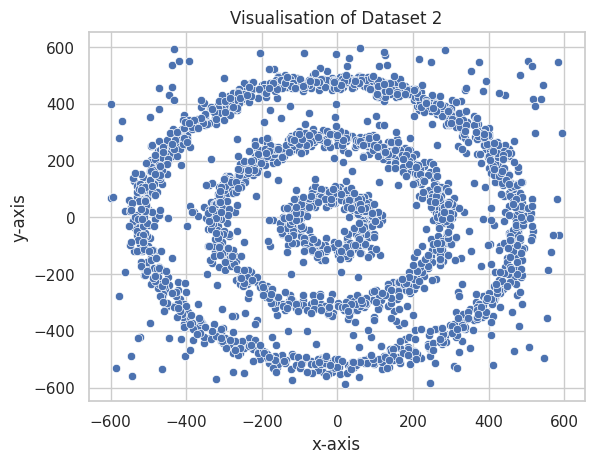

In [ ]:
#Visualisation before feature scaling
data = dataset.to_numpy()
points = data[:,[0,1]]
X = points[:,0]
Y = points[:,1]
plt.title('Visualisation of Dataset 2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
sns.set(style='whitegrid')
sns.scatterplot(x=X,y=Y,data=points)

<Axes: title={'center': 'Elbow Plot Kdistances vs Epsilon'}, xlabel='Indices', ylabel='Epsilon'>

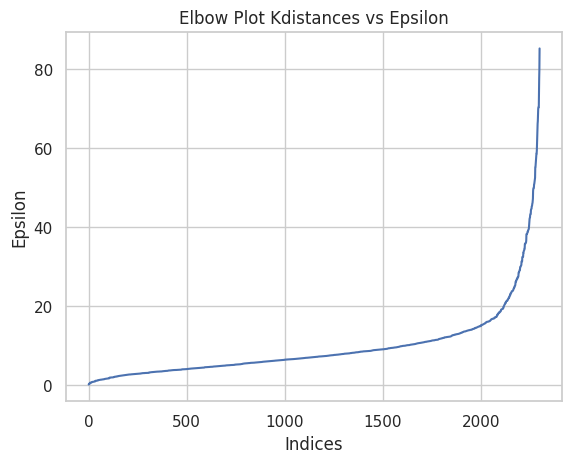

In [ ]:
#Finding Epsilon through Elbow Curve method
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(points)
distances, indices = neighbors_fit.kneighbors(points)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Elbow Plot Kdistances vs Epsilon')
plt.xlabel('Indices')
plt.ylabel('Epsilon')
sns.lineplot(data=distances)

<Axes: title={'center': 'Visualisation of Dataset 2 after feature scaling'}, xlabel='x-axis', ylabel='y-axis'>

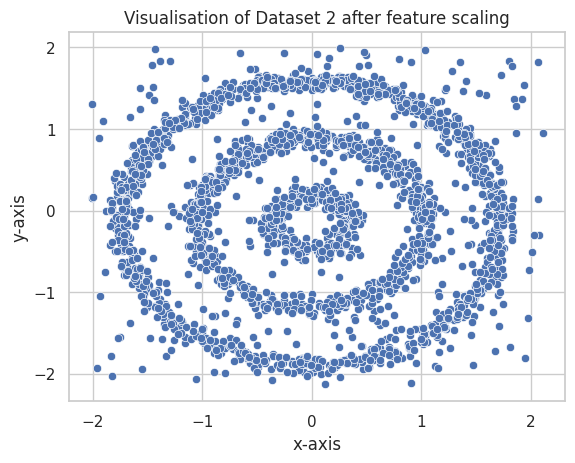

In [ ]:
#Performed Feature Scaling before Visualisation
data = dataset.to_numpy()
points = data[:,[0,1]]
points = feature_scaling(points)
X = points[:,0]
Y = points[:,1]
plt.title('Visualisation of Dataset 2 after feature scaling')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
sns.set(style='whitegrid')
sns.scatterplot(x=X,y=Y,data=points)

<Axes: title={'center': 'Visualisation of Dataset 2'}, xlabel='x-axis', ylabel='y-axis'>

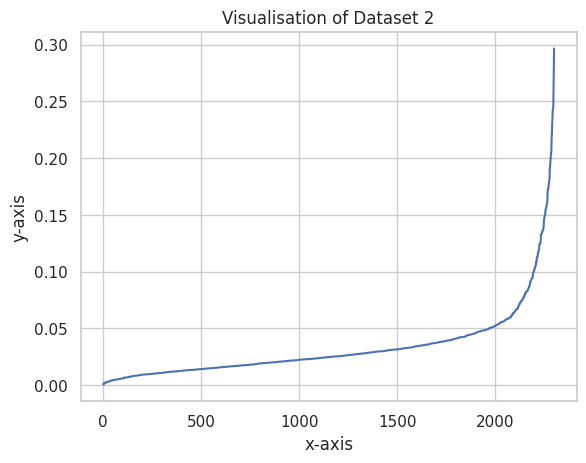

In [ ]:
#Finding Epsilon through Elbow Curve method
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(points)
distances, indices = neighbors_fit.kneighbors(points)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Visualisation of Dataset 2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
sns.set(style='whitegrid')
sns.lineplot(data=distances)

From the graph it looks like epsilon should lie between 0.05 and 0.15 (taking values of range 0.01)

####(2 marks) Implement DBSCAN with the above suitable range of values of epsilon and detect the optimal value of epsilon, which gives the best clustering visually on the dataset. Show a visualization of the clusters formed for the best value of epsilon.

Taking MinPts = 5

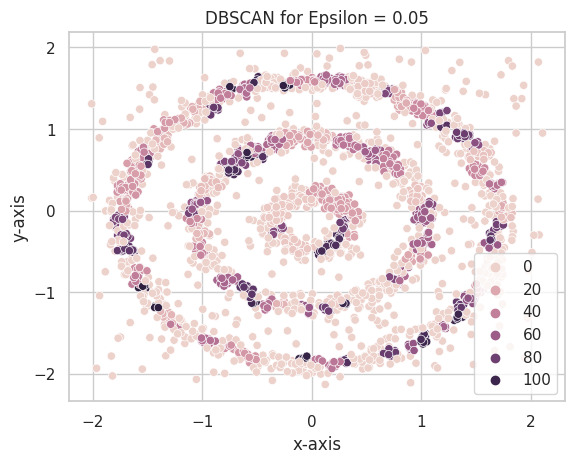

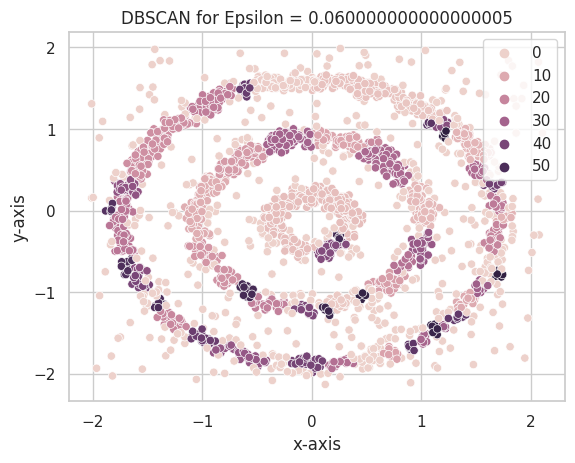

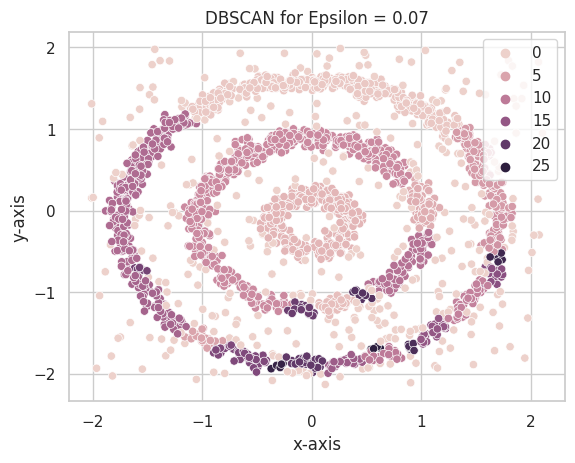

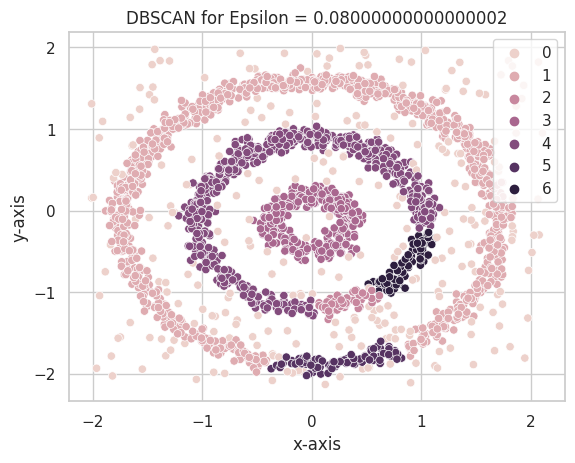

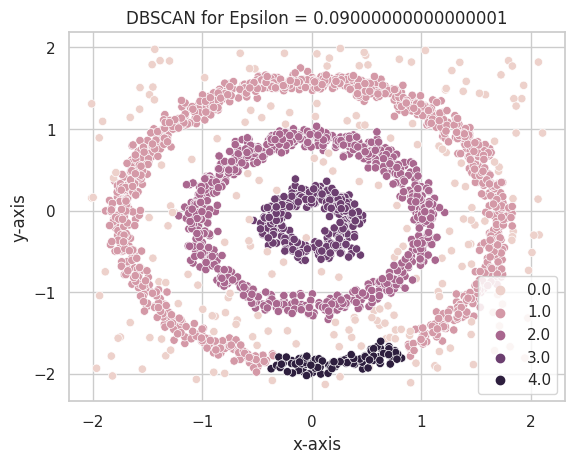

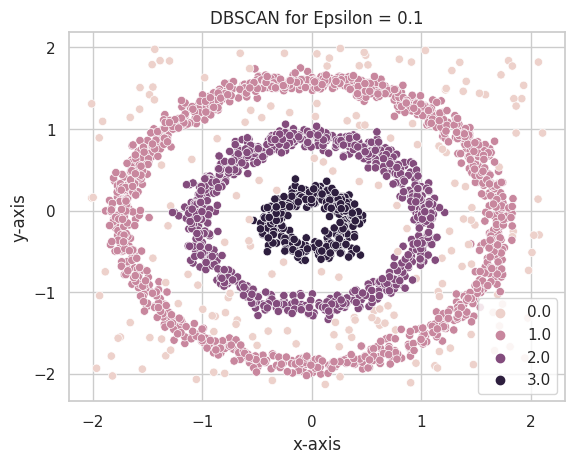

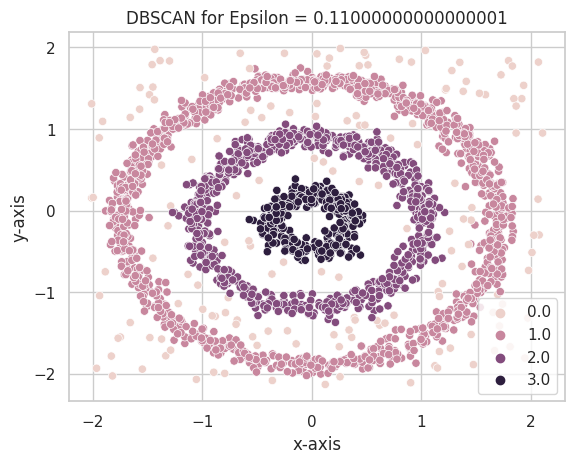

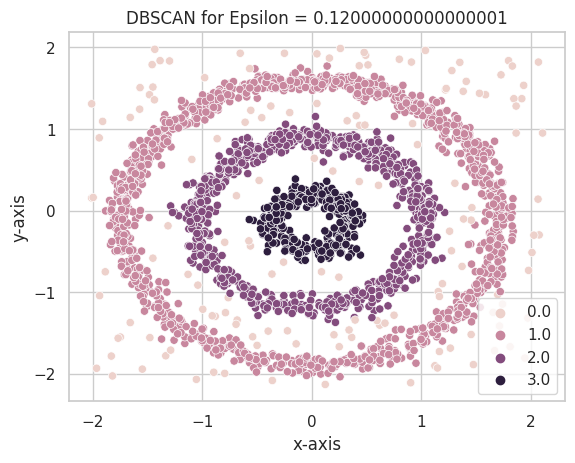

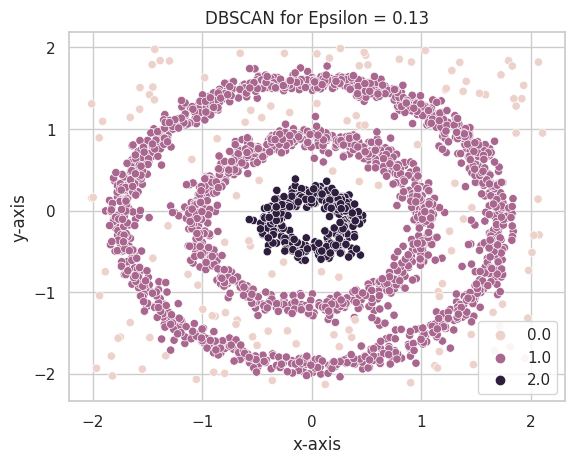

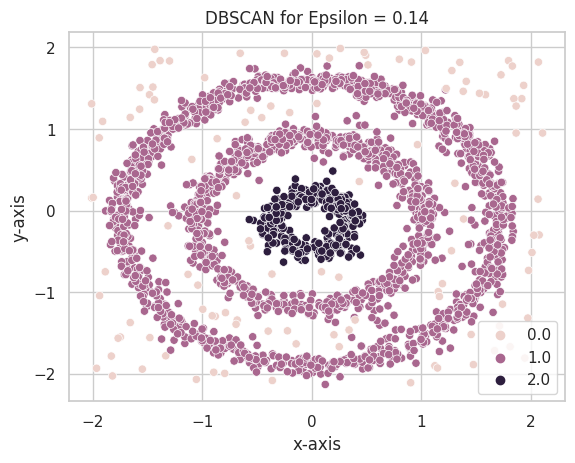

In [ ]:
epsilon = np.arange(0.05,0.15,0.01)
for i in epsilon:
  plt.figure()
  plt.title('DBSCAN for Epsilon = '+str(i))
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plot(DBSCAN_Classifier(points,i,5))

From this we see that from epsilon = 0.12, visually the plot changes a lot more after this (at epsilon = 0.13 only 2 clusters) hence we conclude that epsilon = 0.12 gives the best clustering visually

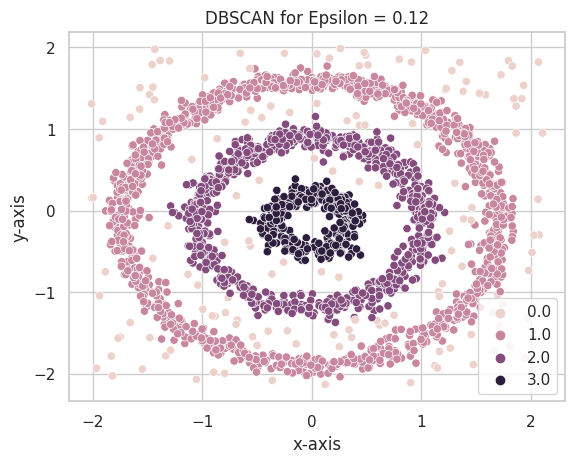

In [ ]:
plt.figure()
plt.title('DBSCAN for Epsilon = '+str(0.12))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plot(DBSCAN_Classifier(points,0.12,5))

####(1.5 marks) Implement K-Means and use it on dataset2 with value of K (number of clusters) set to the optimum number of clusters that you get from (b) above. Suggest various techniques to improve the clustering by KMeans in this case.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


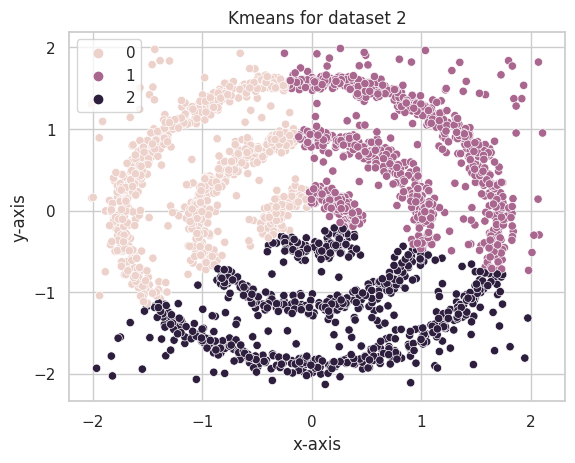

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(points)
sns.scatterplot(x=points[:,0], y=points[:,1],data=points,hue=kmeans.labels_)
plt.title('Kmeans for dataset 2')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

**Ways to improve Kmeans clustering**
Kernalisse it
Non linear decision boundary
RBF

####(1.5 marks) Show a visualization of the data in dataset3. Use your implementation of DBSCAN with minPts=15 on dataset3. Plot ’Elbow curve’ to get an optimal range of values for eps. Detect the optimal value of epsilon which gives the best clustering visually on the dataset. Show a visualization of the clusters formed for the best value of epsilon

<Axes: title={'center': 'Visualisation of Dataset 3'}, xlabel='x-axis', ylabel='y-axis'>

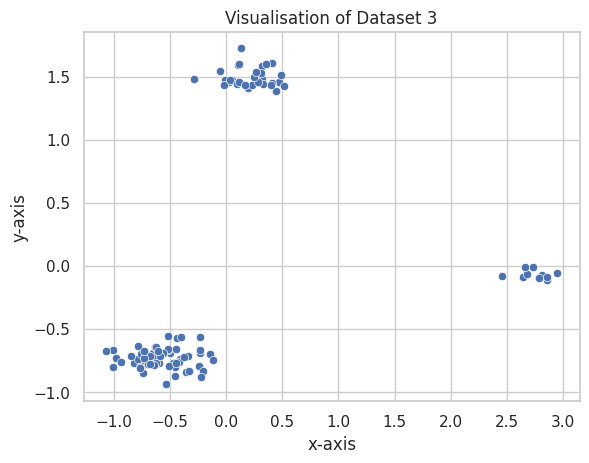

In [ ]:
#Visualisation of data
url = 'https://drive.google.com/file/d/1kmbAVL24U6I2DhaBUuHlk0jYiBpzYgY5/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path)
data2 = dataset.to_numpy()
points2 = data2[:,[0,1]]
points2 = feature_scaling(points2)
X = points2[:,0]
Y = points2[:,1]
plt.title('Visualisation of Dataset 3')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
sns.scatterplot(x=X,y=Y,data=points2)

<Axes: title={'center': 'Elbow Plot Kdistances vs Epsilon'}, xlabel='Indices', ylabel='Epsilon'>

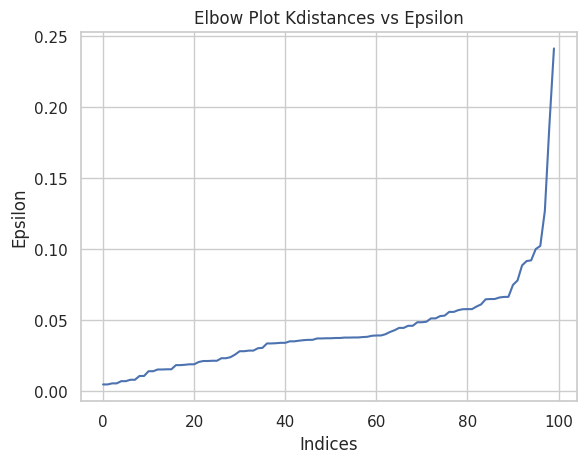

In [ ]:
#Elbow Curve to obtain range of epsilon values
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(points2)
distances, indices = neighbors_fit.kneighbors(points2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('Elbow Plot Kdistances vs Epsilon')
plt.xlabel('Indices')
plt.ylabel('Epsilon')
sns.set(style='whitegrid')
sns.lineplot(data=distances)

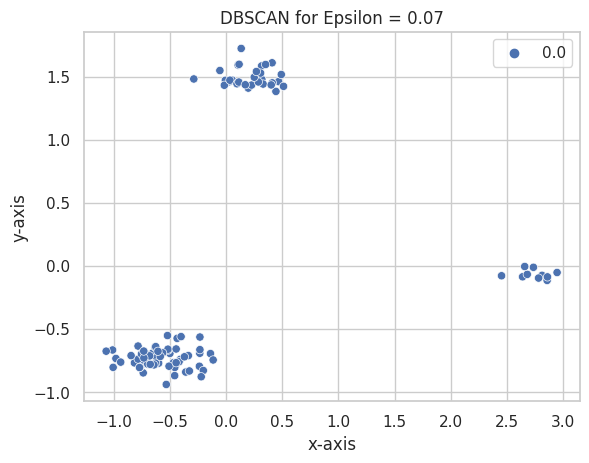

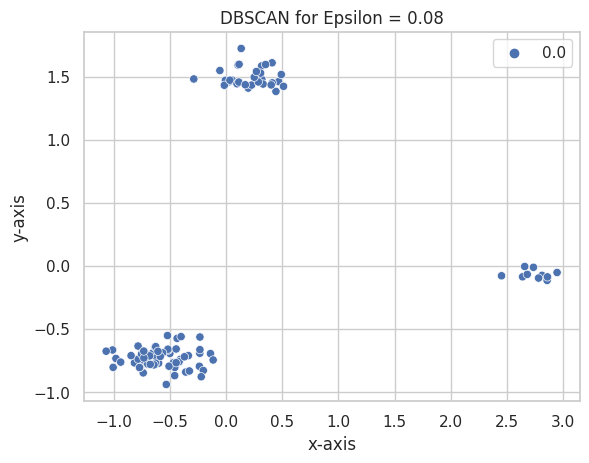

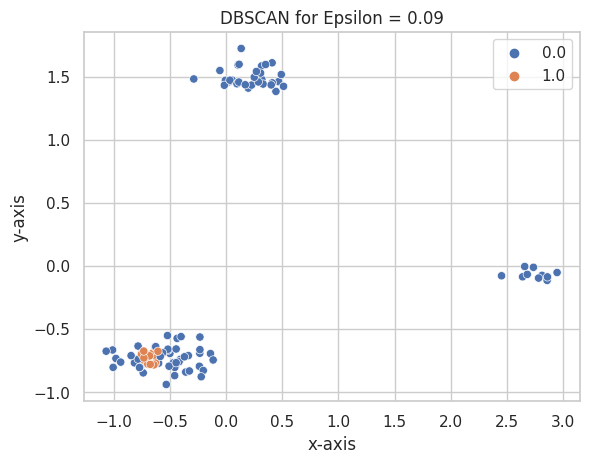

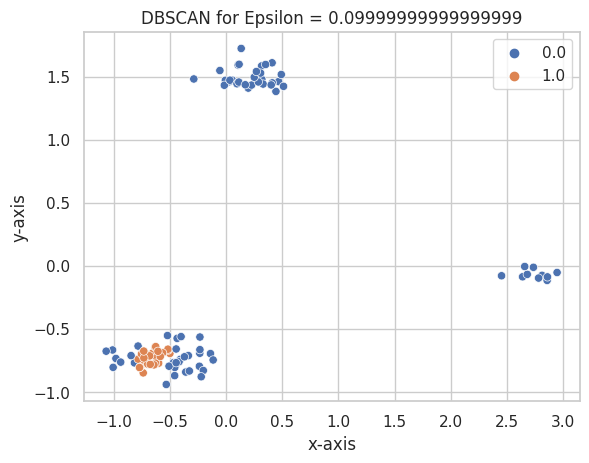

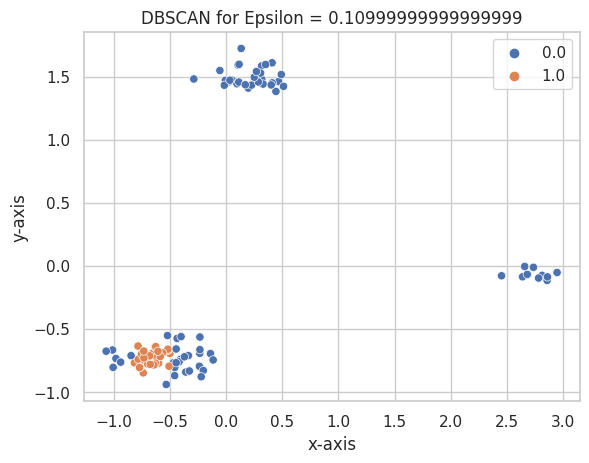

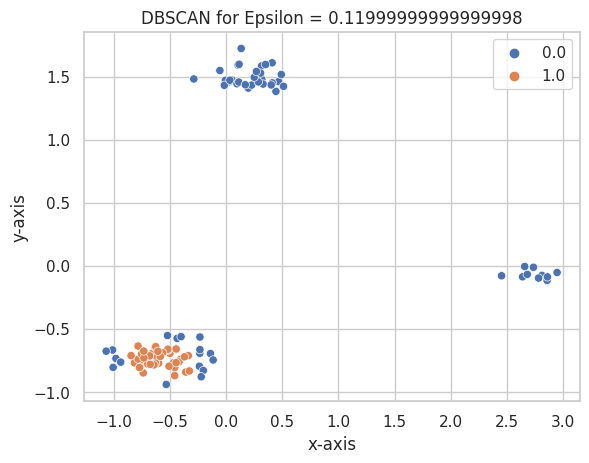

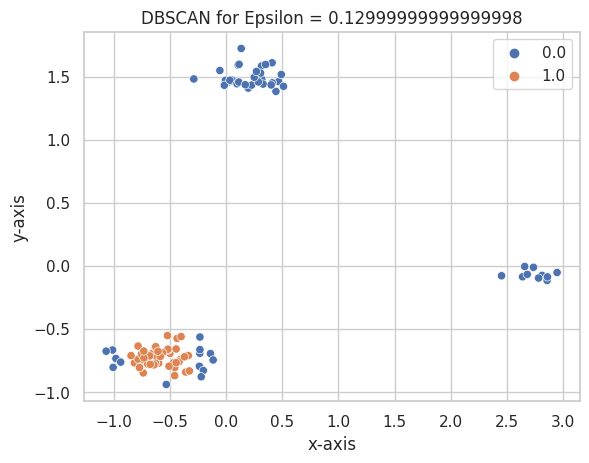

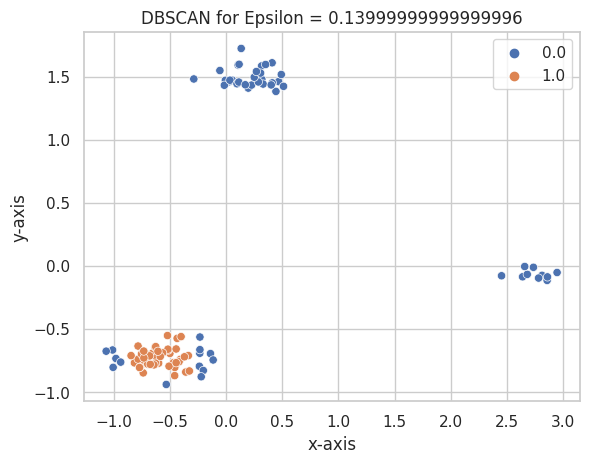

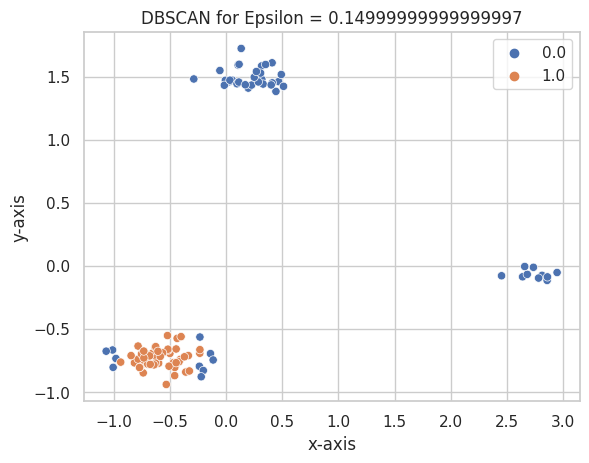

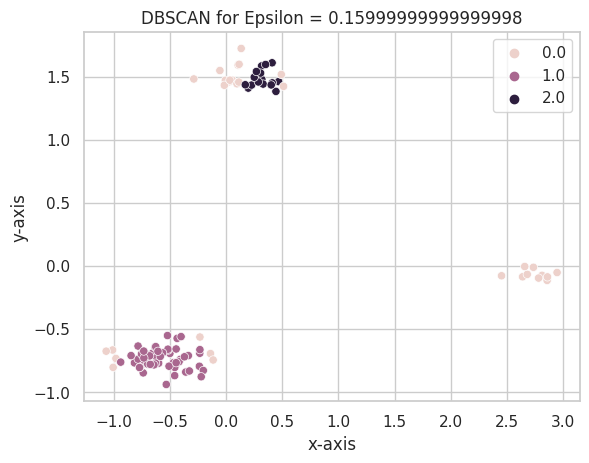

In [ ]:
#Detecting best epsilon
epsilon = np.arange(0.07,0.17,0.01)
for i in epsilon:
  plt.figure()
  plt.title('DBSCAN for Epsilon = '+str(i))
  plt.xlabel('x-axis')
  plt.ylabel('y-axis')
  plot(DBSCAN_Classifier(points2,i,15))

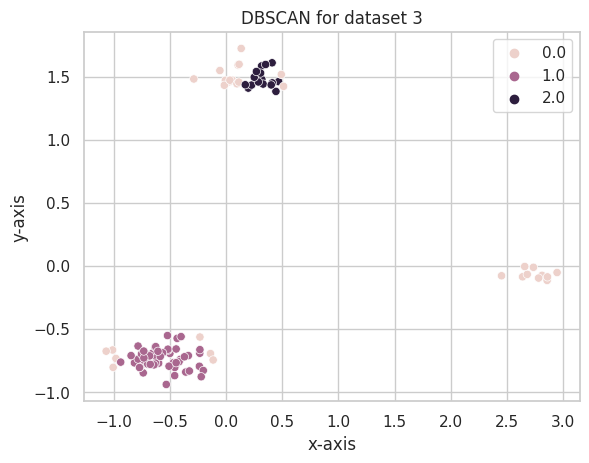

In [ ]:
#From visual data, seems like epsilon = 0.15 is best
plt.title('DBSCAN for dataset 3')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plot(DBSCAN_Classifier(points2,0.16,15))

####(1 mark) Now perform KMeans with K=3. Write your observations for obtained results in (d) and (e). Did we give you bad initialization values?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


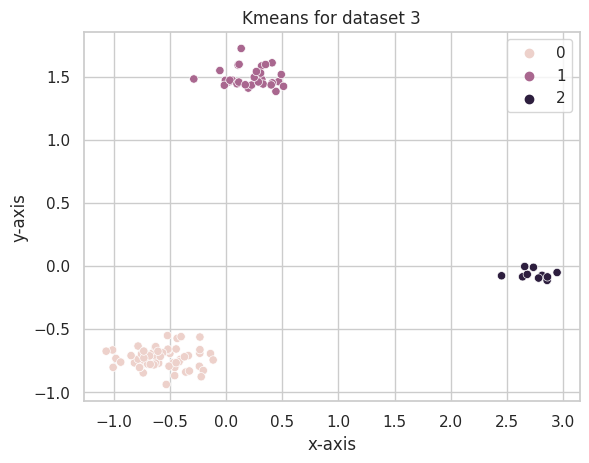

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(points2)
sns.scatterplot(x=points2[:,0], y=points2[:,1],data=points2,hue=kmeans.labels_)
plt.title('Kmeans for dataset 3')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

#References

1. https://anderfernandez.com/en/blog/dbscan-python-tutorial/
2. https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
3. https://www.mikioharman.com/2020-08-24-dbscan/
4. https://www.kdnuggets.com/2020/04/dbscan-clustering-algorithm-machine-learning.html
5. http://article.nadiapub.com/IJDTA/vol9_no4/9.pdf
6. https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/
